In [46]:
%matplotlib inline
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [47]:
# load data from MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [48]:
# save X_test for later comparision 
X_plot = X_test
print X_test.shape

(10000, 28, 28)


In [49]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')


In [50]:
#An RGB color value is specified with: rgb(red, green, blue). 
#Each parameter (red, green, and blue) defines the intensity of the color as an integer between 0 and 255.
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [51]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
print num_classes
#0 0 1 0 0 0 0 0 0 0 

10


In [52]:
# Define a sequential model

def baseline_model():
    # create model
    model = Sequential()
    # add CNN input layers
    model.add(Dense(output_dim=num_pixels, input_dim=num_pixels, init='normal', activation='relu'))
    model.add(Dense(output_dim=num_classes, init='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [53]:
# build the model
model = baseline_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=200, verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

/Users/qian/Program/anaconda/envs/mypython2.7/lib/python2.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="normal", activation="relu", input_dim=784, units=784)`
  import sys
/Users/qian/Program/anaconda/envs/mypython2.7/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10, activation="softmax", kernel_initializer="normal")`
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
5s - loss: 0.2781 - acc: 0.9217 - val_loss: 0.1353 - val_acc: 0.9601
Epoch 2/10
5s - loss: 0.1110 - acc: 0.9680 - val_loss: 0.1077 - val_acc: 0.9684
Epoch 3/10
5s - loss: 0.0712 - acc: 0.9798 - val_loss: 0.0862 - val_acc: 0.9719
Epoch 4/10
5s - loss: 0.0506 - acc: 0.9853 - val_loss: 0.0680 - val_acc: 0.9789
Epoch 5/10
5s - loss: 0.0366 - acc: 0.9896 - val_loss: 0.0655 - val_acc: 0.9793
Epoch 6/10
5s - loss: 0.0262 - acc: 0.9931 - val_loss: 0.0595 - val_acc: 0.9809
Epoch 7/10
5s - loss: 0.0194 - acc: 0.9952 - val_loss: 0.0631 - val_acc: 0.9803
Epoch 8/10
6s - loss: 0.0149 - acc: 0.9964 - val_loss: 0.0599 - val_acc: 0.9813
Epoch 9/10
5s - loss: 0.0113 - acc: 0.9976 - val_loss: 0.0644 - val_acc: 0.9806
Epoch 10/10
5s - loss: 0.0076 - acc: 0.9989 - val_loss: 0.0583 - val_acc: 0.9812
Baseline Error: 1.88%


In [54]:
#print the indices of failed recognitions
predicted_cls = model.predict_classes(X_test)
one_hot = np_utils.to_categorical(predicted_cls)
indices = np.where(y_test != one_hot)[0]
print indices

 9504/10000 [===========================>..] - ETA: 0s[ 115  115  149  149  247  247  321  321  340  340  445  445  495  495  582
  582  659  659  684  684  720  720  813  813  846  846  947  947  951  951
  956  956  965  965 1014 1014 1039 1039 1112 1112 1156 1156 1181 1181 1226
 1226 1232 1232 1242 1242 1247 1247 1260 1260 1299 1299 1319 1319 1328 1328
 1393 1393 1395 1395 1494 1494 1496 1496 1500 1500 1522 1522 1530 1530 1549
 1549 1609 1609 1621 1621 1678 1678 1681 1681 1790 1790 1800 1800 1901 1901
 1941 1941 1982 1982 2004 2004 2024 2024 2033 2033 2035 2035 2053 2053 2070
 2070 2109 2109 2118 2118 2135 2135 2182 2182 2189 2189 2224 2224 2272 2272
 2293 2293 2329 2329 2387 2387 2406 2406 2414 2414 2426 2426 2488 2488 2607
 2607 2648 2648 2654 2654 2863 2863 2896 2896 2915 2915 2921 2921 2939 2939
 2953 2953 3005 3005 3030 3030 3073 3073 3117 3117 3225 3225 3289 3289 3422
 3422 3474 3474 3503 3503 3520 3520 3558 3558 3567 3567 3597 3597 3727 3727
 3751 3751 3757 3757 3780 3780 379

('predicted: ', 9)
('actual: ', 7)


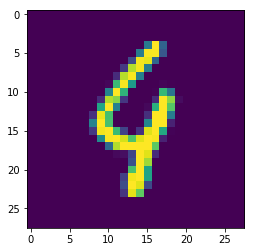

('predicted: ', 9)
('actual: ', 7)


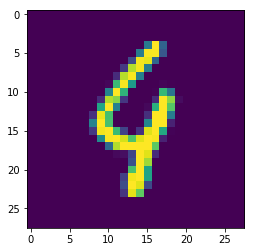

('predicted: ', 9)
('actual: ', 7)


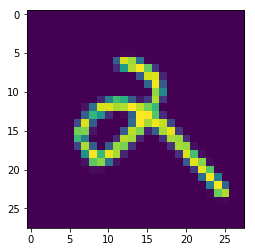

('predicted: ', 9)
('actual: ', 7)


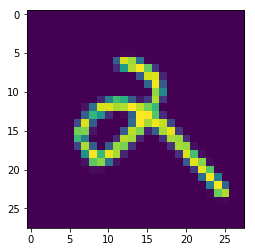

('predicted: ', 2)
('actual: ', 7)


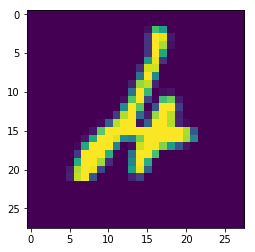

('predicted: ', 2)
('actual: ', 7)


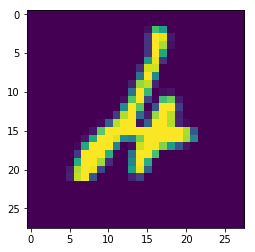

('predicted: ', 7)
('actual: ', 7)


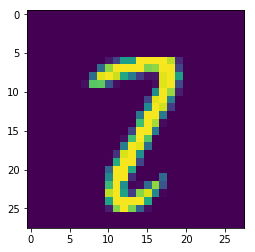

('predicted: ', 7)
('actual: ', 7)


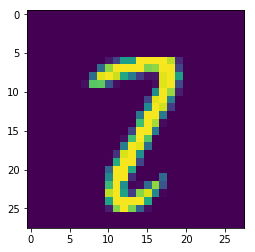

('predicted: ', 3)
('actual: ', 7)


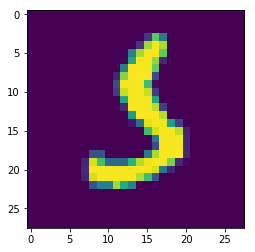

('predicted: ', 3)
('actual: ', 7)


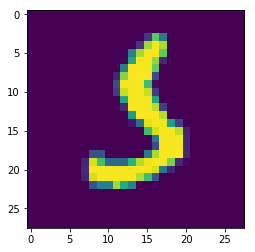

In [55]:
# plot the failed recognitions
for i in indices[0:10]:
    plt.imshow(X_plot[i])
    print("predicted: ", predicted_cls[i])
    print("actual: ",np.where(y_test[0]==1)[0][0]) 
    plt.show()